In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import numpy as np

2024-03-22 11:05:32.143992: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### TRAIN MODEL 

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_data_gen.flow_from_directory(
    'train_set',  
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse',
    classes=['Single Digit','Halves']
)


test_generator = test_data_gen.flow_from_directory(
    'test_set',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse',
    classes=['Single Digit','Halves']
)

Found 8483 images belonging to 2 classes.
Found 2123 images belonging to 2 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax') 
])

In [4]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
history=model.fit(train_generator,validation_data=test_generator,epochs=25)

Epoch 1/25
266/266 [==============================] - 12s 40ms/step - loss: 0.3816 - accuracy: 0.8169 - val_loss: 0.2170 - val_accuracy: 0.9152
Epoch 2/25
266/266 [==============================] - 6s 23ms/step - loss: 0.1298 - accuracy: 0.9552 - val_loss: 0.0690 - val_accuracy: 0.9760
Epoch 3/25
266/266 [==============================] - 6s 22ms/step - loss: 0.0735 - accuracy: 0.9748 - val_loss: 0.1064 - val_accuracy: 0.9581
Epoch 4/25
266/266 [==============================] - 6s 21ms/step - loss: 0.0495 - accuracy: 0.9842 - val_loss: 0.0592 - val_accuracy: 0.9835
Epoch 5/25
266/266 [==============================] - 5s 20ms/step - loss: 0.0441 - accuracy: 0.9853 - val_loss: 0.0629 - val_accuracy: 0.9807
Epoch 6/25
266/266 [==============================] - 6s 21ms/step - loss: 0.0338 - accuracy: 0.9881 - val_loss: 0.0166 - val_accuracy: 0.9948
Epoch 7/25
266/266 [==============================] - 6s 21ms/step - loss: 0.0242 - accuracy: 0.9916 - val_loss: 0.0203 - val_accuracy: 0.993

In [6]:
model.save('Prediction_CNN.keras')

Text(0.5, 0, 'Epochs')

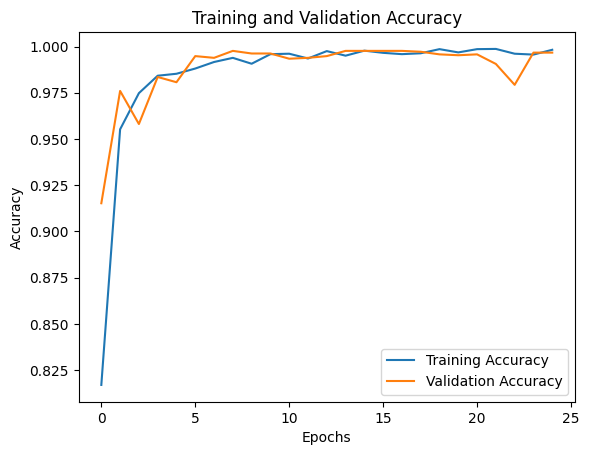

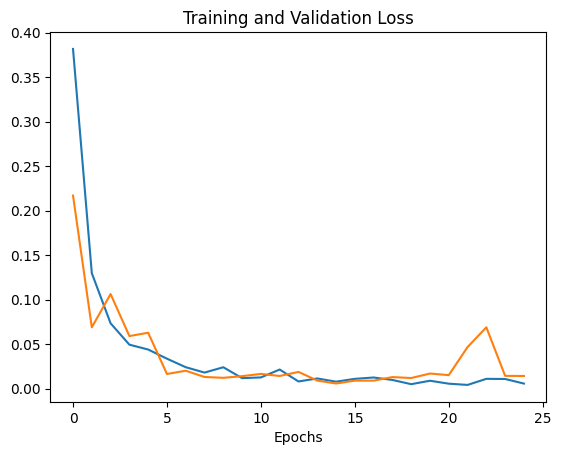

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')

# PREDICT USING MODEL

In [8]:
model=tf.keras.models.load_model('Prediction_CNN.keras')

In [52]:
def prepare_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0 
    return img_array

new_image = prepare_image('./predict_samples/3.5.jpg')


In [53]:
predictions = model.predict(new_image)
classes = ['Single Digit','Halves']
predicted_class = classes[np.argmax(predictions, axis=1)[0]]
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 17ms/step
Predicted class: Halves
